# Importing Libraries and Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Assessing Differences Between Datasets

Reading 2016 Dataset resulted in an encoding error with the default utf-8 encoding. Therefore it was necessary to check the encoding:

In [3]:
import chardet
with open("ks-projects-201612.csv", "rb") as file:
    result = chardet.detect(file.read(323751))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [4]:
data_2016 = pd.read_csv("ks-projects-201612.csv",encoding="cp1252" ,low_memory=False)

In [5]:
data_2018 = pd.read_csv("ks-projects-201801.csv" ,low_memory=False)

### Columns and Null Values

In [6]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

2016 Dataset has 4 Unnamed columns with many null values

In [7]:
data_2016.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

Column names have trailing spaces in 2016 Dataset

In [8]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


On the other hand 2018 Dataset looks more complete.

In [9]:
data_2018.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

Column names in 2018 dataset do not have trailing spaces, in contrast to 2016 dataset.

In [10]:
data_2016["launched "] = pd.to_datetime(data_2016["launched "], errors="coerce")
data_2016["deadline "] = pd.to_datetime(data_2016["deadline "], errors="coerce")

data_2018["launched"] = pd.to_datetime(data_2018["launched"], errors="coerce")
data_2018["deadline"] = pd.to_datetime(data_2018["deadline"], errors="coerce")

In [11]:
data_2016["launched "].describe()

C:\Users\TahaGalata\AppData\Local\Temp\ipykernel_5876\3119419691.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_2016["launched "].describe()


count                  323169
unique                 322649
top       2000-01-01 00:00:00
freq                       22
first     1700-01-01 00:00:00
last      2250-01-01 00:00:00
Name: launched , dtype: object

2016 dataset has invalid launch dates, as seen in first and last date

In [12]:
data_2018["launched"].describe()

C:\Users\TahaGalata\AppData\Local\Temp\ipykernel_5876\628765251.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_2018["launched"].describe()


count                  378661
unique                 378089
top       1970-01-01 01:00:00
freq                        7
first     1970-01-01 01:00:00
last      2018-01-02 15:02:31
Name: launched, dtype: object

Launch dates in 2018 dataset seems much more reasonable.

### Assessing Matching Records

In [13]:
len(data_2016) == len(data_2016["ID "].unique())

True

In [14]:
len(data_2018) == len(data_2018["ID"].unique())

True

ID Columns are unique for both datasets

In [15]:
data_2016.index.isin(data_2018.index).sum()

323750

Number of matching ids is equal to number of rows in 2016 data.

In [16]:
data_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [17]:
data_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


IDs also corresponds to same projects. Therefore 2018 Data Contains All Data from 2016 Dataset.

In [18]:
# Delete 2016 Data
del data_2016

In [19]:
# Set index as ID
data_2018.set_index("ID", drop=True, inplace=True)
data_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Data Cleaning and Preprocessing

## Elimination of Features

In [20]:
len(data_2018["main_category"].unique())

15

In [21]:
len(data_2018["category"].unique())

159

In [22]:
data_2018["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

* **category** feature will be dropped since it has too many unique values for one hot encoding and main category retains most of the information.<br>
* **name** can be used another classification model with word embedding. But for now, it will not be used.
* **state** will be dropped since a **success** feature will be created which is similar to this, but with only two classes 

Monetary features that will be dropped and reasons:
* **currency**: Values other than USD are already converted to USD as **usd_pledged_real** and **usd_goal_real**.
* **goal**: It is in local currency and we need a common unit of currency for comparisons. This is given as **usd_goal_real**.
* **pledged**: It is in local currency and we need a common unit of currency for comparisons. This is given as **usd_pledged_real**.
* **usd_pledged**: Total amount after the conversion of other units is given as **usd_pledged_real**.

In [23]:
processed_df = data_2018.loc[:, ["main_category", "deadline", "launched", "backers", "country", "usd_pledged_real", "usd_goal_real"]]
processed_df.head()

,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real
ID,,,,,,,
1000002330,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95
1000003930,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00
1000004038,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00
1000007540,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00
1000011046,Film & Video,2015-08-29,2015-07-04 08:35:03,14,US,1283.0,19500.00


## Checking for Null Values & Anomalies

In [24]:
processed_df.isna().sum()

main_category       0
deadline            0
launched            0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

No null values for selected features.

### Deadline

In [25]:
processed_df["deadline"].describe()

C:\Users\TahaGalata\AppData\Local\Temp\ipykernel_5876\2214703396.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  processed_df["deadline"].describe()


count                  378661
unique                   3164
top       2014-08-08 00:00:00
freq                      705
first     2009-05-03 00:00:00
last      2018-03-03 00:00:00
Name: deadline, dtype: object

### Launched

Date range seems reasonable

In [26]:
processed_df["launched"].describe()

C:\Users\TahaGalata\AppData\Local\Temp\ipykernel_5876\538555991.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  processed_df["launched"].describe()


count                  378661
unique                 378089
top       1970-01-01 01:00:00
freq                        7
first     1970-01-01 01:00:00
last      2018-01-02 15:02:31
Name: launched, dtype: object

Kickstarter is found in 2009. Therefore, launch dates before 2009 are invalid.

In [27]:
processed_df[processed_df["launched"] < np.datetime64("2009-01-01")]

,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real
ID,,,,,,,
1014746686,Film & Video,2010-09-15,1970-01-01 01:00:00,0,US,0.0,5000.00
1245461087,Art,2010-08-14,1970-01-01 01:00:00,0,US,0.0,15000.00
1384087152,Film & Video,2010-05-21,1970-01-01 01:00:00,0,US,0.0,700.00
1480763647,Theater,2010-06-01,1970-01-01 01:00:00,0,US,0.0,4000.00
330942060,Music,2010-05-04,1970-01-01 01:00:00,0,US,0.0,10000.00
462917959,Design,2010-04-10,1970-01-01 01:00:00,0,US,0.0,500.00
69489148,Publishing,2015-10-31,1970-01-01 01:00:00,0,CH,0.0,1905.97


Since there are only a few of such rows, they will be filtered out:

In [28]:
processed_df = processed_df.loc[processed_df["launched"] >= np.datetime64("2009-01-01")]

### Backers

In [29]:
processed_df["backers"].describe()

count    378654.000000
mean        105.619428
std         907.193306
min           0.000000
25%           2.000000
50%          12.000000
75%          56.000000
max      219382.000000
Name: backers, dtype: float64

In [30]:
processed_df.sort_values(by="backers", ascending=False)

,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real
ID,,,,,,,
1955357092,Games,2015-02-20,2015-01-20 19:00:19,219382,US,8782571.99,10000.00
1386523707,Design,2016-10-20,2016-08-30 22:02:09,154926,US,6465690.30,15000.00
557230947,Technology,2014-07-02,2014-05-28 15:05:45,105857,US,5408916.95,1000000.00
1755266685,Film & Video,2013-04-13,2013-03-13 15:42:22,91585,US,5702153.38,2000000.00
1929840910,Games,2012-03-14,2012-02-09 02:52:52,87142,US,3336371.92,400000.00
...,...,...,...,...,...,...,...
344442000,Technology,2015-01-18,2014-12-19 23:02:54,0,US,0.00,100000.00
1526670840,Publishing,2015-05-14,2015-04-14 05:41:04,0,"N,0""",522.00,5000.00
344429182,Technology,2015-10-10,2015-09-11 00:10:34,0,CA,0.00,15471.49


Although upper range of backers seems high, these projects also have pledged high amounts. Therefore, I assume these values as correct.

### Country

In [31]:
processed_df["country"].value_counts()

US      292621
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         760
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

N,0" value is assumed as typo and converted to NO (Norway): 

In [32]:
processed_df["country"] = processed_df["country"].apply(lambda x: "NO" if "N,0" in x else x)
processed_df["country"].value_counts()

US    292621
GB     33672
CA     14756
AU      7839
NO      4505
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       760
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

## Future Engineering

### Success Future

Funding will be considered as successfull (1) if pledged amount (**usd_pledged_real**) is greater or equal to targeted amount (**usd_goal_real**), unsuccessfull (0) otherwise. Original dataset had **state** feature. However, it contains different values which might not be directly related to the funding success of the project.

In [33]:
processed_df["success"] = (processed_df["usd_pledged_real"] > processed_df["usd_goal_real"]).astype(int)
processed_df.head()

,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,success
ID,,,,,,,,
1000002330,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95,0
1000003930,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00,0
1000004038,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00,0
1000007540,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00,0
1000011046,Film & Video,2015-08-29,2015-07-04 08:35:03,14,US,1283.0,19500.00,0


### Project Length

A longer project has more opportunity to collect money from backers. Project length can be calculated from the difference between **deadline** and **launched** dates, in days.

In [34]:
processed_df["project_length"] = (processed_df["deadline"] - processed_df["launched"]) / np.timedelta64(1, 'D')

### Launch Year and Month

There might be some years that Kickstarter projects were popular, which I would like to examine. Also, I would to see whether there is a difference between the months of the year in terms of project success.

In [35]:
processed_df["launch_year"] = processed_df["launched"].dt.year
processed_df["launch_month"] = processed_df["launched"].dt.month
processed_df.head()

,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,success,project_length,launch_year,launch_month
ID,,,,,,,,,,,
1000002330,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95,0,58.491343,2015,8
1000003930,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00,0,59.802813,2017,9
1000004038,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00,0,44.985532,2013,1
1000007540,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00,0,29.858206,2012,3
1000011046,Film & Video,2015-08-29,2015-07-04 08:35:03,14,US,1283.0,19500.00,0,55.642326,2015,7


In [36]:
processed_df.drop(["deadline", "launched"], axis=1, inplace=True)
processed_df.head()

,main_category,backers,country,usd_pledged_real,usd_goal_real,success,project_length,launch_year,launch_month
ID,,,,,,,,,
1000002330,Publishing,0,GB,0.0,1533.95,0,58.491343,2015,8
1000003930,Film & Video,15,US,2421.0,30000.00,0,59.802813,2017,9
1000004038,Film & Video,3,US,220.0,45000.00,0,44.985532,2013,1
1000007540,Music,1,US,1.0,5000.00,0,29.858206,2012,3
1000011046,Film & Video,14,US,1283.0,19500.00,0,55.642326,2015,7


## Encoding Categorical Data

Since categorical features (**main_category** and **country**) are nominal, one hot encoding will be used.

### Main Category

In [37]:
encoded_df = pd.get_dummies(processed_df, "ctg_", columns=["main_category"])

In [38]:
encoded_df.head(1)

,backers,country,usd_pledged_real,usd_goal_real,success,project_length,launch_year,launch_month,ctg__Art,ctg__Comics,...,ctg__Fashion,ctg__Film & Video,ctg__Food,ctg__Games,ctg__Journalism,ctg__Music,ctg__Photography,ctg__Publishing,ctg__Technology,ctg__Theater
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,0,GB,0.0,1533.95,0,58.491343,2015,8,0,0,...,0,0,0,0,0,0,0,1,0,0


### Country

In [39]:
encoded_df = pd.get_dummies(encoded_df, "country_", columns=["country"])
encoded_df.head(3)

,backers,usd_pledged_real,usd_goal_real,success,project_length,launch_year,launch_month,ctg__Art,ctg__Comics,ctg__Crafts,...,country__IT,country__JP,country__LU,country__MX,country__NL,country__NO,country__NZ,country__SE,country__SG,country__US
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,0,0.0,1533.95,0,58.491343,2015,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003930,15,2421.0,30000.00,0,59.802813,2017,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000004038,3,220.0,45000.00,0,44.985532,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Explorative Analysis

In [40]:
processed_df.head()

,main_category,backers,country,usd_pledged_real,usd_goal_real,success,project_length,launch_year,launch_month
ID,,,,,,,,,
1000002330,Publishing,0,GB,0.0,1533.95,0,58.491343,2015,8
1000003930,Film & Video,15,US,2421.0,30000.00,0,59.802813,2017,9
1000004038,Film & Video,3,US,220.0,45000.00,0,44.985532,2013,1
1000007540,Music,1,US,1.0,5000.00,0,29.858206,2012,3
1000011046,Film & Video,14,US,1283.0,19500.00,0,55.642326,2015,7


## Main Category

<Axes: title={'center': 'Number of Projects per Category'}, xlabel='Categories', ylabel='Number of Projects'>

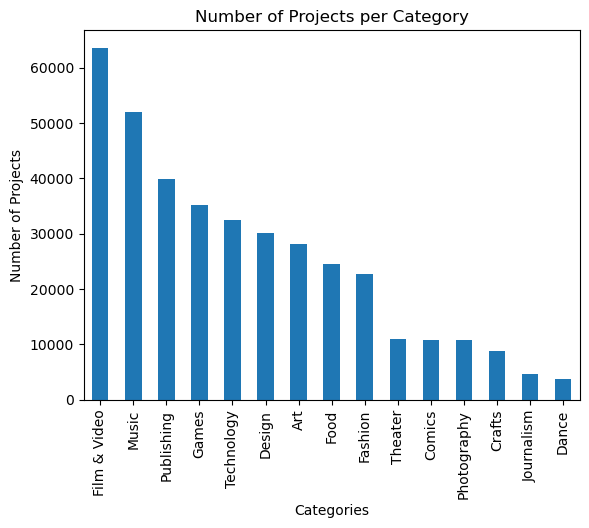

In [41]:
processed_df["main_category"].value_counts().plot(kind="bar", 
                                                  title= "Number of Projects per Category", 
                                                  xlabel="Categories", ylabel= "Number of Projects")

In [41]:
avg_main_categ = processed_df.groupby("main_category").mean(numeric_only=True)

<Axes: title={'center': 'Average Num. of Backers per Category'}, xlabel='Category', ylabel='Average Num. of Backers'>

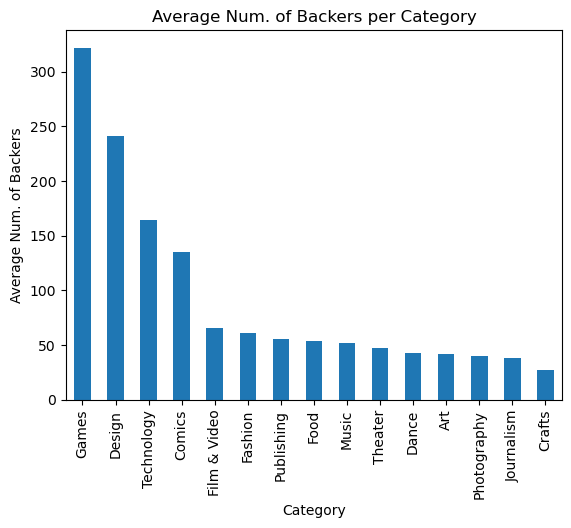

In [42]:
avg_main_categ.sort_values(by="backers", ascending=False)\
    .plot(kind="bar", y="backers", 
          title="Average Num. of Backers per Category",
          xlabel="Category", ylabel= "Average Num. of Backers", legend=False)

<Axes: title={'center': 'Average Pledged USD per Category'}, xlabel='Category', ylabel='Average Pledged (USD)'>

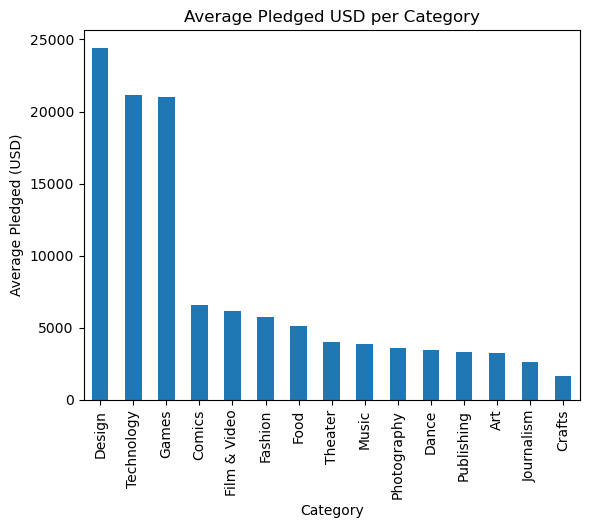

In [43]:
avg_main_categ.sort_values(by="usd_pledged_real", ascending=False)\
    .plot(kind="bar", y="usd_pledged_real", 
          title="Average Pledged USD per Category",
          xlabel="Category", ylabel= "Average Pledged (USD)", legend=False)

<Axes: title={'center': 'Average Goal USD per Category'}, xlabel='Category', ylabel='Average Goal (USD)'>

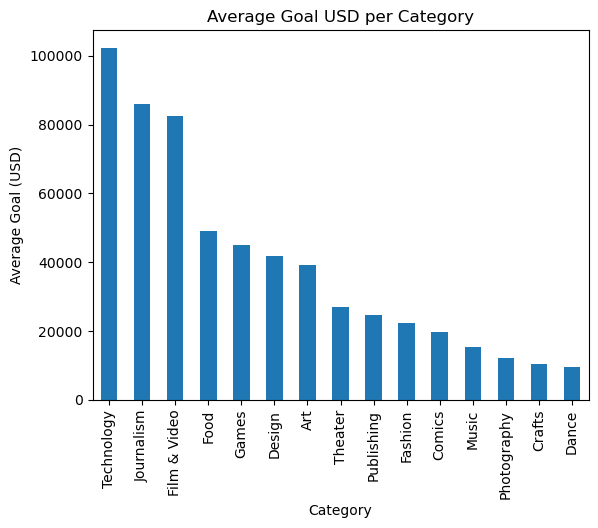

In [44]:
avg_main_categ.sort_values(by="usd_goal_real", ascending=False)\
    .plot(kind="bar", y="usd_goal_real", 
          title="Average Goal USD per Category",
          xlabel="Category", ylabel= "Average Goal (USD)", legend=False)

<Axes: title={'center': 'Average Success USD per Category'}, xlabel='Category', ylabel='Average Success'>

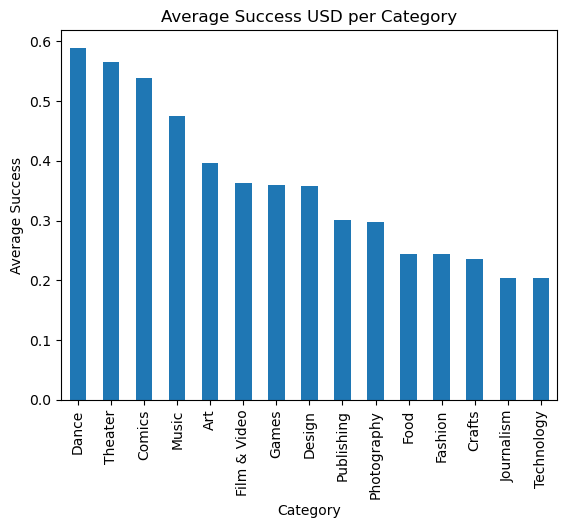

In [45]:
avg_main_categ.sort_values(by="success", ascending=False)\
    .plot(kind="bar", y="success", 
          title="Average Success USD per Category",
          xlabel="Category", ylabel= "Average Success", legend=False)

**Result**: Although Design, Technology and Games Categories have the highest pledges, they fail to achieve their goal since their goals are quite high, especially for Technology category. <br> 
Dance, Theater and Comics categories have the most successfull fundings thanks to their lower goals. These categories might be good choices for a new Kickstarter project.

## Country

<Axes: title={'center': 'Number of Projects per Country'}, xlabel='Categories', ylabel='Number of Projects'>

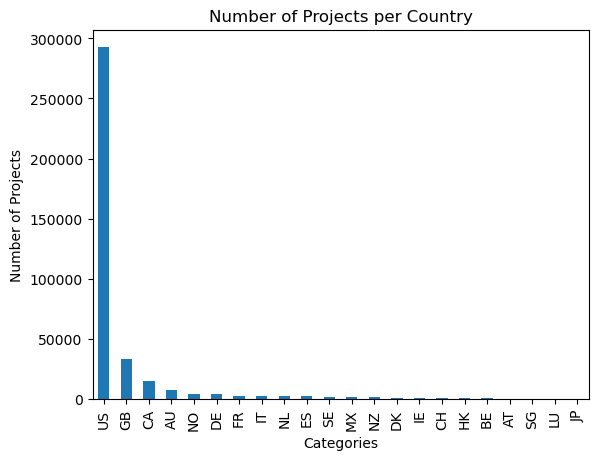

In [42]:
processed_df["country"].value_counts().plot(kind="bar", 
                                                  title= "Number of Projects per Country", 
                                                  xlabel="Categories", ylabel= "Number of Projects")

United States has the most number of projects on Kickstarter

In [43]:
avg_country = processed_df.groupby("country").mean(numeric_only=True)

<Axes: title={'center': 'Average Num. of Backers per Project Country'}, xlabel='Project Country', ylabel='Average Num. of Backers'>

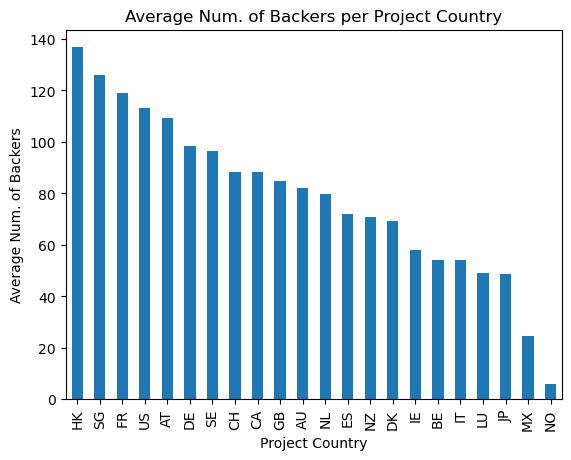

In [44]:
avg_country.sort_values(by="backers", ascending=False)\
    .plot(kind="bar", y="backers", 
          title="Average Num. of Backers per Project Country",
          xlabel="Project Country", ylabel= "Average Num. of Backers", legend=False)

<Axes: title={'center': 'Average Pledged USD per Project Country'}, xlabel='Project Country', ylabel='Average Pledged (USD)'>

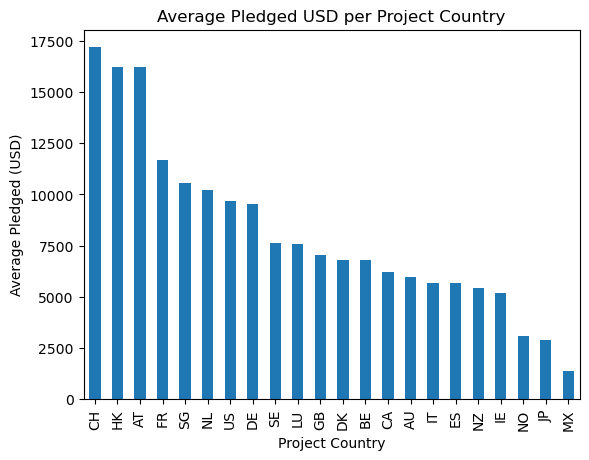

In [45]:
avg_country.sort_values(by="usd_pledged_real", ascending=False)\
    .plot(kind="bar", y="usd_pledged_real", 
          title="Average Pledged USD per Project Country",
          xlabel="Project Country", ylabel= "Average Pledged (USD)", legend=False)

<Axes: title={'center': 'Average Goal USD per Project Country'}, xlabel='Project Country', ylabel='Average Goal (USD)'>

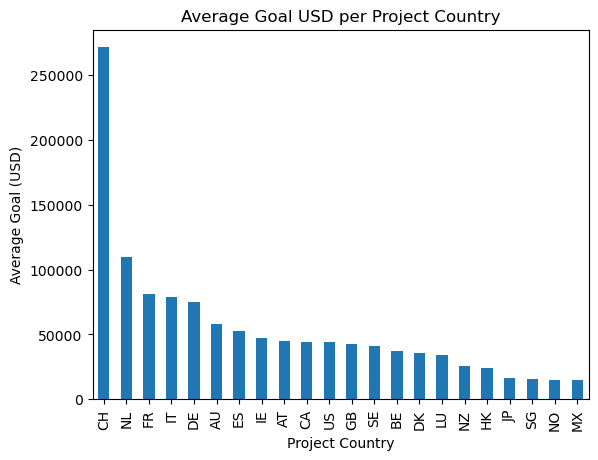

In [46]:
avg_country.sort_values(by="usd_goal_real", ascending=False)\
    .plot(kind="bar", y="usd_goal_real", 
          title="Average Goal USD per Project Country",
          xlabel="Project Country", ylabel= "Average Goal (USD)", legend=False)

<Axes: title={'center': 'Average Success per Project Country'}, xlabel='Project Country', ylabel='Average Success'>

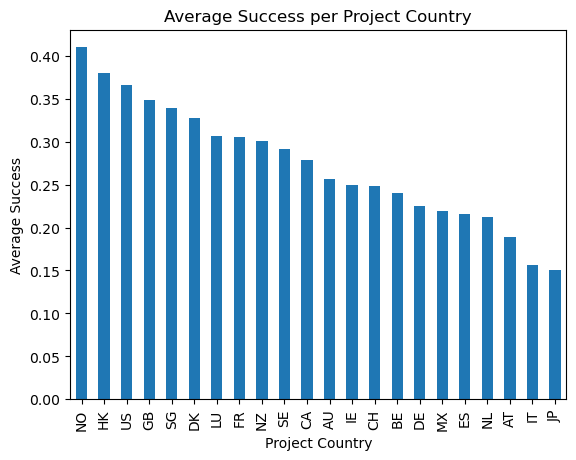

In [47]:
avg_country.sort_values(by="success", ascending=False)\
    .plot(kind="bar", y="success", 
          title="Average Success per Project Country",
          xlabel="Project Country", ylabel= "Average Success", legend=False)

## Launch Year

<Axes: >

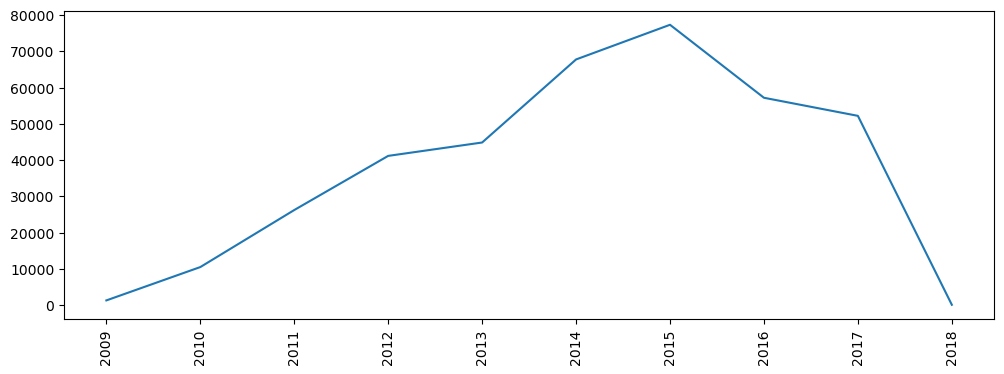

In [48]:
processed_df["launch_year"].value_counts().sort_index().plot(xticks=np.arange(2009,2019), figsize=(12,4), rot=90)

In [53]:
processed_df["launch_year"].value_counts().sort_values(ascending=False)

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
Name: launch_year, dtype: int64

<Axes: title={'center': 'Average Success per Year'}, xlabel='Year', ylabel='Average Success'>

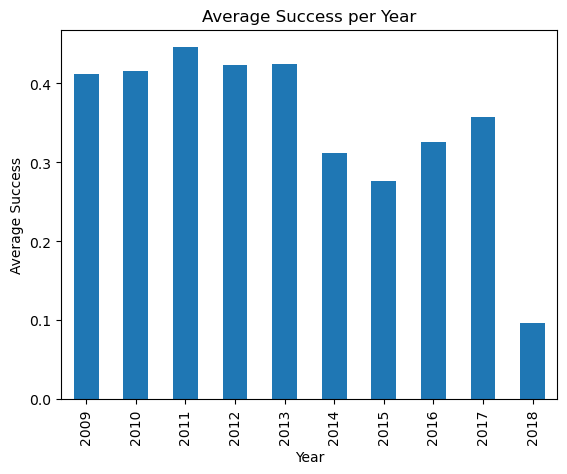

In [54]:
processed_df.groupby("launch_year").mean(numeric_only=True)\
    .sort_index()\
    .plot(kind="bar", y="success", 
          title="Average Success per Year",
          xlabel="Year", ylabel= "Average Success", legend=False)

## Launch Month

<Axes: title={'center': 'Number of Projects per Category'}, xlabel='Categories', ylabel='Number of Projects'>

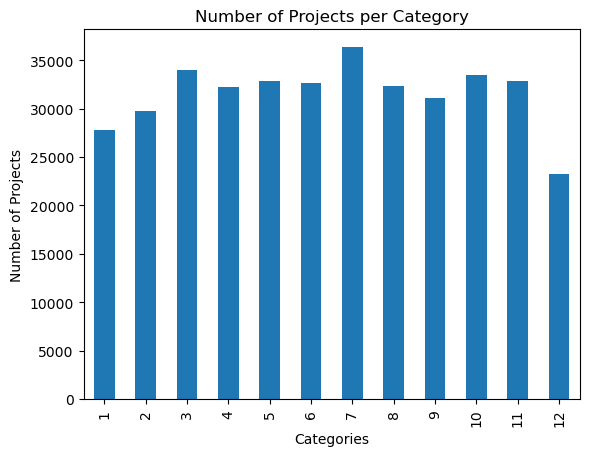

In [56]:
processed_df["launch_month"].value_counts().sort_index().plot(kind="bar", 
                                                  title= "Number of Projects per Category", 
                                                  xlabel="Categories", ylabel= "Number of Projects")

<Axes: title={'center': 'Average Success per Launch Month'}, xlabel='Year', ylabel='Average Success'>

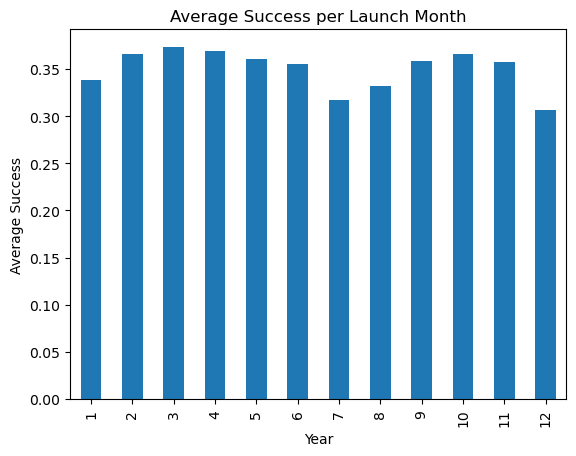

In [57]:
processed_df.groupby("launch_month").mean(numeric_only=True)\
    .sort_index()\
    .plot(kind="bar", y="success", 
          title="Average Success per Launch Month",
          xlabel="Year", ylabel= "Average Success", legend=False)

# Modelling

In [58]:
encoded_df.head()

,backers,usd_pledged_real,usd_goal_real,success,project_length,launch_year,launch_month,ctg__Art,ctg__Comics,ctg__Crafts,...,country__IT,country__JP,country__LU,country__MX,country__NL,country__NO,country__NZ,country__SE,country__SG,country__US
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,0,0.0,1533.95,0,58.491343,2015,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003930,15,2421.0,30000.00,0,59.802813,2017,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000004038,3,220.0,45000.00,0,44.985532,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000007540,1,1.0,5000.00,0,29.858206,2012,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000011046,14,1283.0,19500.00,0,55.642326,2015,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1


C:\Users\TahaGalata\AppData\Local\Temp\ipykernel_10196\1533148080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(processed_df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

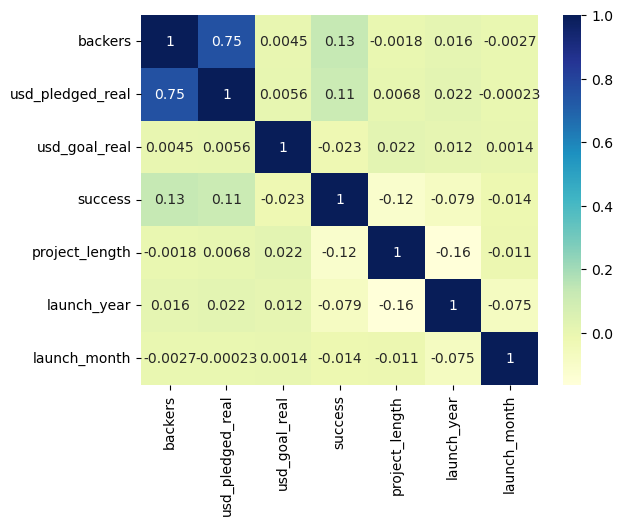

In [59]:
sb.heatmap(processed_df.corr(), cmap="YlGnBu", annot=True)

In [60]:
# Dropping usd_pledged_real since it is used in the calculation of success and backers since it is highly corrolated with usd_pledged_real
encoded_df.drop(["usd_pledged_real", "backers"], axis=1, inplace=True)

In [61]:
encoded_df.head()

,usd_goal_real,success,project_length,launch_year,launch_month,ctg__Art,ctg__Comics,ctg__Crafts,ctg__Dance,ctg__Design,...,country__IT,country__JP,country__LU,country__MX,country__NL,country__NO,country__NZ,country__SE,country__SG,country__US
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,1533.95,0,58.491343,2015,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003930,30000.00,0,59.802813,2017,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000004038,45000.00,0,44.985532,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000007540,5000.00,0,29.858206,2012,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000011046,19500.00,0,55.642326,2015,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop(["success"], axis=1), encoded_df["success"], test_size=0.2)

## Grid Search for Classifier and Hyperparameters

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
# Create a pipeline
pipe = Pipeline([('scaler', preprocessing.StandardScaler()),('Classifier',RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'Classifier': [LogisticRegression(solver="liblinear")],
                 'Classifier__C': [0.1,1,10,100,1000,10000],
                 'Classifier__penalty': ['l1','l2']},
                {'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
                {'Classifier': [RandomForestClassifier(random_state=0)],
                 'Classifier__n_estimators': [5,10,15,20,25,30],
                 'Classifier__max_depth': [2,5,10,15,20],
                 'Classifier__min_samples_split': [2,4,6,8]},
                {'Classifier': [GradientBoostingClassifier(max_depth=1)],
                 'Classifier__n_estimators': [100,1000,5000,10000],
                 'Classifier__learning_rate': [1,0.1,0.01]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=3,scoring='accuracy')
# Fit grid search
best_model = clf.fit(X_train, y_train.values)
# View best model
best_model.best_estimator_.get_params()['Classifier']

In [64]:
# Training the best model according to the grid search:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)
rf = RandomForestClassifier(n_estimators=300, criterion="gini", max_features=18)

rf.fit(X_trainStandard, y_train)
y_pred = rf.predict(X_testStandard)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6710858169045701


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[40164,  9338],
       [15571, 10658]], dtype=int64)

In [66]:
from sklearn.metrics import precision_score
print('Precision:', precision_score(y_test, y_pred))

Precision: 0.533006601320264


In [78]:
from sklearn.metrics import recall_score
print('Precision:', recall_score(y_test, y_pred))

Precision: 0.40634412291738153


In [77]:
pd.Series(rf.feature_importances_.round(2), index=encoded_df.drop("success",axis=1).columns).sort_values(ascending=False)

project_length       0.41
usd_goal_real        0.24
launch_month         0.14
launch_year          0.07
ctg__Games           0.01
country__GB          0.01
country__CA          0.01
ctg__Theater         0.01
ctg__Technology      0.01
ctg__Publishing      0.01
ctg__Music           0.01
country__US          0.01
ctg__Food            0.01
ctg__Fashion         0.01
ctg__Comics          0.01
ctg__Design          0.01
ctg__Art             0.01
ctg__Film & Video    0.01
country__SG          0.00
country__SE          0.00
country__NZ          0.00
country__HK          0.00
country__NL          0.00
country__MX          0.00
country__LU          0.00
country__JP          0.00
country__IT          0.00
country__IE          0.00
country__NO          0.00
country__ES          0.00
country__FR          0.00
ctg__Journalism      0.00
country__DK          0.00
country__DE          0.00
country__CH          0.00
country__BE          0.00
ctg__Crafts          0.00
country__AT          0.00
ctg__Dance  